Students:
Niv Yona - 209327600
Einav Dvora - 209531508

In [1]:
import pandas as pd
df = pd.read_csv("spam_ham_dataset.csv") # loading the data frame

# checking for missing values

In [2]:
df.info() # to check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


#  pre-processing of data

In [3]:
#transforming the raw data into a more understandable NLP contex.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')

stop_words = stopwords.words('english')
df['cleaned_text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words])) #remove stopwords
df['cleaned_text'] = df['cleaned_text'].str.replace(r'[^\w\s]+', '') # remove punctuations
df['cleaned_text'] = df['cleaned_text'].str.lower() # Change all the text to lower case

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nivyo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nivyo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\nivyo\AppData\Local\Temp\ipykernel_13252\3720685147.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cleaned_text'] = df['cleaned_text'].str.replace(r'[^\w\s]+', '') # remove punctuations


# Tokenizing the Cleaned Data

In [4]:
df['tokenized'] = df.apply(lambda row: nltk.word_tokenize(row['cleaned_text']), axis=1) #tokenization
df.head()

,Unnamed: 0,label,text,label_num,cleaned_text,tokenized
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter 988291 follow ...,"[subject, enron, methanol, meter, 988291, foll..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom january 9 2001 see attached ...,"[subject, hpl, nom, january, 9, 2001, see, att..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonderf...,"[subject, neon, retreat, ho, ho, ho, around, w..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap mai...,"[subject, photoshop, windows, office, cheap, m..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject indian springs deal book teco pvr rev...,"[subject, indian, springs, deal, book, teco, p..."


# Exploratory Data Analysis

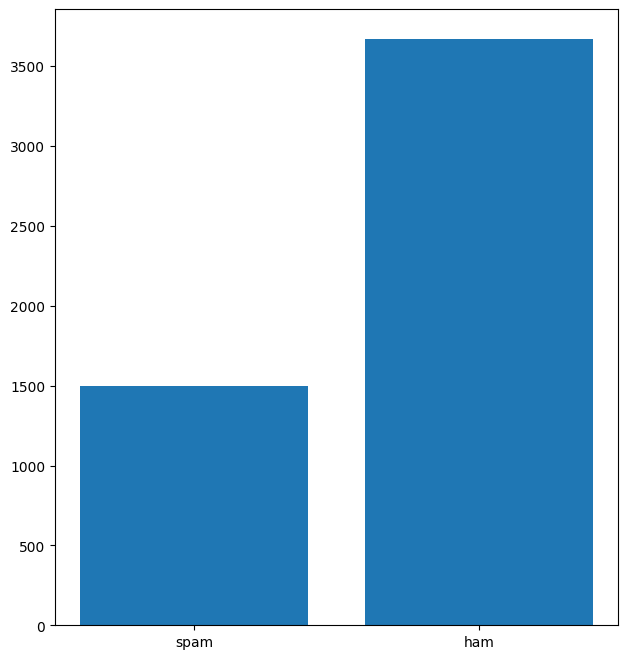

In [5]:
import matplotlib.pyplot as plt
ham = df[df.label_num == 0].shape[0]
spam = df[df.label_num == 1].shape[0]
plt.figure(1, figsize=(16,8))
plt.subplot(1,2,1)
plt.bar(['spam', 'ham'], [spam, ham]) #bar chart to see the distribution of the target column
plt.show()

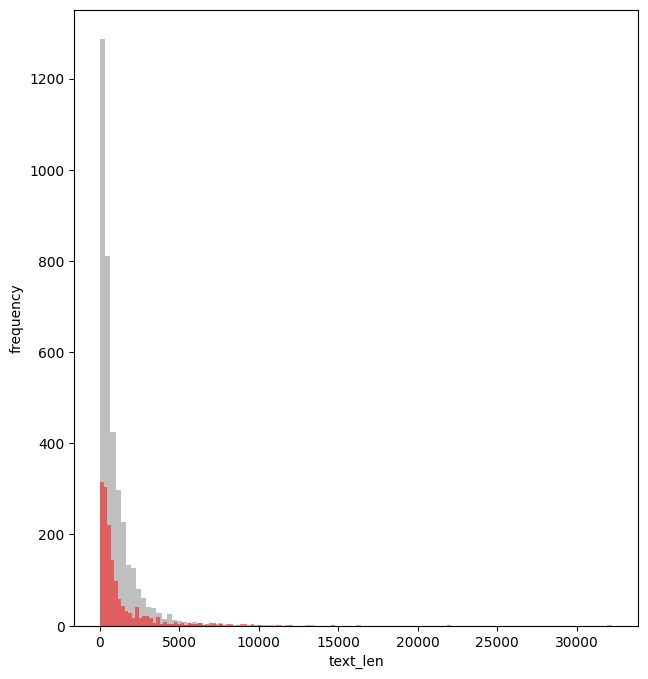

In [6]:
def plot_target_based_features(feature): # A function that produces a histogram for the received features
    x1=df[df.label_num == 1][feature] #spam
    x2=df[df.label_num == 0][feature] #ham
    plt.figure(1, figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.hist(x2, alpha=0.5, color="grey", bins=100)#ham
    plt.hist(x1, alpha=0.5, color="red", bins=100)#spam

df['text_len'] = df.text.map(lambda x:len(x))
plot_target_based_features('text_len') # histogram based on text length

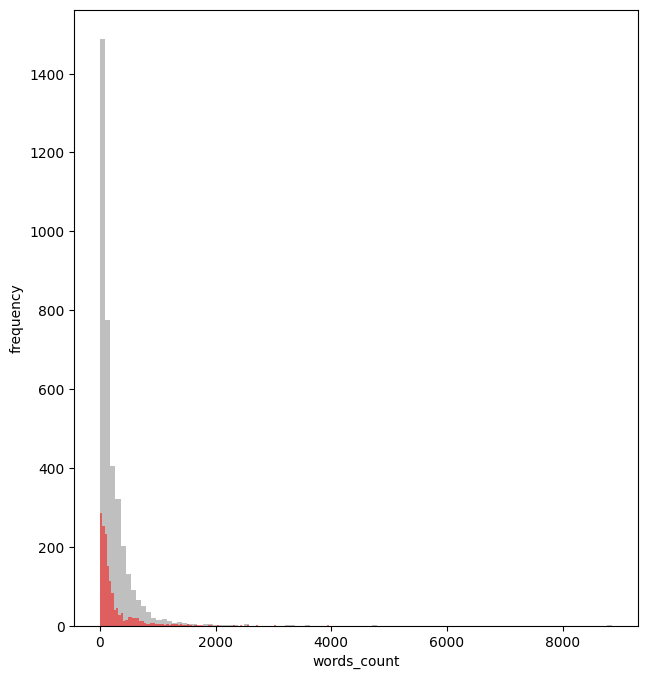

In [7]:
df['words_count'] = df.text.str.split().map(lambda x:len(x))
plot_target_based_features('words_count')  # histogram based on words count

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

df_new = df[['cleaned_text', 'label_num']]
train, test = train_test_split(df_new, test_size=0.2, random_state=1) # splitting the data for train set and test set

vocabulary = []
for list in df['tokenized']: # making a list of all the tokenized words
    vocabulary += list
wordset = set(vocabulary) # transform the list to set so that each value will be unique
TfidfVectorizer = TfidfVectorizer(vocabulary=wordset)
print("Features:", TfidfVectorizer.get_feature_names_out()) # extract features
print()

X_train = TfidfVectorizer.fit_transform(train['cleaned_text'])
df_bow_train = pd.DataFrame(X_train.toarray(), columns=TfidfVectorizer.get_feature_names_out())
print(df_bow_train.head())
print(f'Train with {X_train.shape[0]} records with {X_train.shape[1]} features')

X_test = TfidfVectorizer.fit_transform(test['cleaned_text'])
df_bow_test = pd.DataFrame(X_test.toarray(), columns=TfidfVectorizer.get_feature_names_out())
print(df_bow_test.head())
print(f'Test with {X_test.shape[0]} records with {X_test.shape[1]} features')

y_train = train['label_num']
y_test = test['label_num']

Features: ['0' '00' '000' ... 'zzocb' 'zzso' 'zzsyt']

     0        00      000  0000  000000  000000000002858  000000000049773  \
0  0.0  0.000000  0.00000   0.0     0.0              0.0              0.0   
1  0.0  0.000000  0.07245   0.0     0.0              0.0              0.0   
2  0.0  0.219126  0.00000   0.0     0.0              0.0              0.0   
3  0.0  0.000000  0.00000   0.0     0.0              0.0              0.0   
4  0.0  0.000000  0.00000   0.0     0.0              0.0              0.0   

   000080  000099  0001  ...  zynve  zyqtaqlt  zyrtec  zyyqywp  zzezrjok  zzn  \
0     0.0     0.0   0.0  ...    0.0       0.0     0.0      0.0       0.0  0.0   
1     0.0     0.0   0.0  ...    0.0       0.0     0.0      0.0       0.0  0.0   
2     0.0     0.0   0.0  ...    0.0       0.0     0.0      0.0       0.0  0.0   
3     0.0     0.0   0.0  ...    0.0       0.0     0.0      0.0       0.0  0.0   
4     0.0     0.0   0.0  ...    0.0       0.0     0.0      0.0       0.0  0.0

# Classification Models

In [9]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

def train_classifier(classifier, X_train, y_train, X_test, y_test): #A function that train the models and predict on the test set
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1 = f1_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred)
    return accuracy,precision,f1,recall

def train_indices(classifier, X_train, y_train): # A function that predict on the train set
    y_pred = classifier.predict(X_train)
    accuracy = accuracy_score(y_train,y_pred)
    precision = precision_score(y_train,y_pred)
    f1 = f1_score(y_train, y_pred, average='binary')
    recall = recall_score(y_train, y_pred)
    return accuracy,precision,f1,recall

In [10]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

classifier_KNN = KNeighborsClassifier(n_neighbors=30)
accuracy_test_KNN, precision_test_KNN, recall_test_KNN, F1_test_KNN =train_classifier(classifier_KNN,X_train,y_train,X_test,y_test)

print("accuracy test", accuracy_test_KNN)
print("recall test", recall_test_KNN)
print("precision test", precision_test_KNN)
print("f1 score test", F1_test_KNN)
print()
accuracy_train_KNN, precision_train_KNN, recall_train_KNN, F1_train_KNN =train_indices(classifier_KNN,X_train,y_train)
print("accuracy train", accuracy_train_KNN)
print("recall train", recall_train_KNN)
print("precision train", precision_train_KNN)
print("f1 score train", F1_train_KNN)

accuracy test 0.9594202898550724
recall test 0.9263157894736842
precision test 0.9924812030075187
f1 score test 0.868421052631579

accuracy train 0.9605899419729207
recall train 0.9283516483516484
precision train 0.9777777777777777
f1 score train 0.8836820083682009


In [11]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
import numpy as np

classifier_LR = LogisticRegression(random_state=1, penalty='l2')
accuracy_test_LR, precision_test_LR, recall_test_LR, F1_test_LR =train_classifier(classifier_LR,X_train,y_train,X_test,y_test)
print("accuracy test", accuracy_test_LR)
print("recall test", recall_test_LR)
print("precision test", precision_test_LR)
print("f1 score test", F1_test_LR)
print()
accuracy_train_LR, precision_train_LR, recall_train_LR, F1_train_LR =train_indices(classifier_LR,X_train,y_train)
print("accuracy train", accuracy_train_LR)
print("recall train", recall_train_LR)
print("precision train", precision_train_LR)
print("f1 score train", F1_train_LR)

accuracy test 0.991304347826087
recall test 0.9853658536585366
precision test 0.9742765273311897
f1 score test 0.9967105263157895

accuracy train 0.995164410058027
recall train 0.9916874480465503
precision train 0.9851362510322048
f1 score train 0.998326359832636


In [12]:
# Support Vector Classification (SVC)
from sklearn.svm import SVC

classifier_SVC = SVC(random_state=1, kernel='sigmoid',gamma=1)

accuracy_test_SVC, precision_test_SVC, recall_test_SVC, F1_test_SVC =train_classifier(classifier_SVC,X_train,y_train,X_test,y_test)
print("accuracy test", accuracy_test_SVC)
print("recall test", recall_test_SVC)
print("precision test", precision_test_SVC)
print("f1 score test", F1_test_SVC)
print()
accuracy_train_SVC, precision_train_SVC, recall_train_SVC, F1_train_SVC =train_indices(classifier_SVC,X_train,y_train)
print("accuracy train", accuracy_train_SVC)
print("recall train", recall_train_SVC)
print("precision train", precision_train_SVC)
print("f1 score train", F1_train_SVC)

accuracy test 0.9922705314009662
recall test 0.9869706840390879
precision test 0.9774193548387097
f1 score test 0.9967105263157895

accuracy train 0.996615087040619
recall train 0.9941715237302248
precision train 0.9892294946147473
f1 score train 0.999163179916318


In [13]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

classifier_RF = RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=250, random_state=1)
accuracy_test_RF, precision_test_RF, recall_test_RF, F1_test_RF =train_classifier(classifier_RF,X_train,y_train,X_test,y_test)
print("accuracy test", accuracy_test_RF)
print("recall test", recall_test_RF)
print("precision test", precision_test_RF)
print("f1 score test", F1_test_RF)
print()
accuracy_train_RF, precision_train_RF, recall_train_RF, F1_train_RF =train_indices(classifier_RF,X_train,y_train)
print("accuracy train", accuracy_train_RF)
print("recall train", recall_train_RF)
print("precision train", precision_train_RF)
print("f1 score train", F1_train_RF)

accuracy test 0.9797101449275363
recall test 0.9654036243822075
precision test 0.966996699669967
f1 score test 0.9638157894736842

accuracy train 0.9968568665377177
recall train 0.9945810754481034
precision train 0.9908637873754153
f1 score train 0.998326359832636


# Table of the results of the models

In [14]:
from tabulate import tabulate

data_train = [["Logistic Regression", accuracy_train_LR, recall_train_LR,precision_train_LR, F1_train_LR],
        ["SVC", accuracy_train_SVC, recall_train_SVC,precision_train_SVC, F1_train_SVC],
        ["KNeighbors", accuracy_train_KNN, recall_train_KNN,precision_train_KNN, F1_train_KNN],
        ["Random Forest",accuracy_train_RF, recall_train_RF,precision_train_RF, F1_train_RF ]]
col_names = ["Model", "Accuracy - Train", "Recall - Train", "Precision - Train", "f1 score - Train"]
print(tabulate(data_train, headers=col_names)) # table of the train results
print()
data_test = [["Logistic Regression", accuracy_test_LR, recall_test_LR,precision_test_LR, F1_test_LR],
              ["SVC", accuracy_test_SVC, recall_test_SVC,precision_test_SVC, F1_test_SVC],
              ["KNeighbors", accuracy_test_KNN, recall_test_KNN,precision_test_KNN, F1_test_KNN],
              ["Random Forest",accuracy_test_RF, recall_test_RF,precision_test_RF, F1_test_RF]]
col_names = ["Model", "Accuracy - Test", "Recall - Test", "Precision - Test", "f1 score - Test"]
print(tabulate(data_test, headers=col_names)) # table of the test results

Model                  Accuracy - Train    Recall - Train    Precision - Train    f1 score - Train
-------------------  ------------------  ----------------  -------------------  ------------------
Logistic Regression            0.995164          0.991687             0.985136            0.998326
SVC                            0.996615          0.994172             0.989229            0.999163
KNeighbors                     0.96059           0.928352             0.977778            0.883682
Random Forest                  0.996857          0.994581             0.990864            0.998326

Model                  Accuracy - Test    Recall - Test    Precision - Test    f1 score - Test
-------------------  -----------------  ---------------  ------------------  -----------------
Logistic Regression           0.991304         0.985366            0.974277           0.996711
SVC                           0.992271         0.986971            0.977419           0.996711
KNeighbors               

To examine the results of the models first we will look for overfitting.
overfitting occurs when the model doesn't perform on the test set as well on the train set.
According to that, we can see that in all the models, the indices of the train and the test set are approximately close so there is no concern for overfitting.
Second, we will examine the indices to choose the model with the best performance.
The best model is the SVC model because it has the highest indices (and the highest accuracy).

SVC is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The algorithm creates a line or a hyperplane which separates the data into classes.
One reason that can cause the difference in the models is the advantages of the SVC model over the other models.
SVC offers very high accuracy compared to other classifiers such as logistic regression and decision trees. It is known for its kernel trick to handle nonlinear input spaces.
SVC works well with unstructured and semi-structured data like text and images while logistic regression works with already identified independent variables.
SVC takes care of outliers better than KNN and logistic regression. In addition, SVC outperforms KNN when there are large features and we have a large number of features in our case.
Compared to Random Forest, RF is intrinsically suited for multiclass problems, while SVC is intrinsically two-class - our problem is binary.

Another reason is the selection of the hyperparameters.  Hyperparameters are important because they directly control the behavior of the training algorithm and have a significant impact on the performance of the model being trained.
So, there is a chance that the choice of hyperparameters for the SVC model was the best over the rest models, and it is possible that if we had made a GridSearch we would have gotten different results.